# Exploratory Data Analysis (EDA): A Comprehensive Introduction

In the realm of data science, before the sophisticated algorithms and predictive models come into play, there lies a crucial first step: Exploratory Data Analysis (EDA). EDA is the art of unveiling insights, patterns, and anomalies within datasets. It's the preliminary investigation that helps data scientists understand their data, ask the right questions, and lay the foundation for robust analyses. In this article, we'll embark on a journey into the world of EDA, exploring its importance, techniques, and practical applications.

The Essence of EDA: EDA is akin to an archaeological expedition where data scientists unearth hidden treasures within raw data. It involves scrutinizing data's characteristics, distributions, and relationships through visualizations and summary statistics. By doing so, analysts can form hypotheses, refine research objectives, and identify potential pitfalls.

## Key Goals of EDA:

- Data Familiarization: EDA begins with data collection and cleaning. By understanding the structure and nature of the data, analysts can address missing values, outliers, and anomalies.
- Pattern Recognition: Visualization tools such as histograms, scatter plots, and box plots help uncover patterns, trends, and correlations that inform subsequent analyses.
- Hypothesis Generation: EDA encourages the formulation of hypotheses to explore relationships between variables. This guides further investigation and model creation.
- Data Quality Assurance: EDA allows the identification of data inconsistencies, inaccuracies, and biases, leading to higher data quality and more reliable insights.
## Techniques in EDA:

- Univariate Analysis: This focuses on understanding individual variables, their distributions, and statistical properties. Histograms, density plots, and summary statistics are often employed.
- Bivariate Analysis: This explores the relationships between pairs of variables. Scatter plots, correlation matrices, and joint distribution plots help identify connections and dependencies.
- Multivariate Analysis: Involves the study of interactions among multiple variables. Techniques like heatmaps and pair plots reveal complex patterns.
- Outlier Detection: EDA helps identify anomalies that can significantly impact analyses. Box plots, z-scores, and isolation forests are used to spot outliers. 
- Temporal Analysis: For time-series data, EDA uncovers temporal trends, seasonality, and cyclic patterns. Time series plots and autocorrelation plots aid in understanding such data.

## Practical Applications: EDA finds applications across industries:

- Finance: EDA helps in risk assessment by studying the relationships between market variables.
- Healthcare: By analyzing patient data, EDA can identify risk factors and correlations.
- Marketing: EDA aids in customer segmentation, revealing insights into purchasing behaviors.
- Manufacturing: EDA optimizes production processes by analyzing sensor data.
- Social Sciences: In psychology and sociology, EDA reveals behavioral patterns and trends.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt

In [3]:
## Data frame
df=pd.read_csv("Dataset/World Largest Cities by Population 2024.csv")

In [4]:
#Dimension of dataframe
df.shape

(801, 6)

In [5]:
#How data look like
df.sample(5)
df.head()
np.where(df["Growth Rate"]==np.max(df["Growth Rate"]))
df.iloc[451:453,:]

,Unnamed: 0,City,Country,Population (2024),Population (2023),Growth Rate
451,451,Bujumbura,Burundi,1277050,1206767,0.0582
452,452,Zhenjiang Jiangsu,China,1275395,1250668,0.0198


In [6]:
#Data Type of Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         801 non-null    int64  
 1   City               801 non-null    object 
 2   Country            801 non-null    object 
 3   Population (2024)  801 non-null    int64  
 4   Population (2023)  801 non-null    int64  
 5   Growth Rate        801 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 37.7+ KB


In [7]:
# Missing values
df.isna().sum()

Unnamed: 0           0
City                 0
Country              0
Population (2024)    0
Population (2023)    0
Growth Rate          0
dtype: int64

In [8]:
## How does the data look like methametically (statics)
df.describe()

,Unnamed: 0,Population (2024),Population (2023),Growth Rate
count,801.000000,8.010000e+02,8.010000e+02,801.000000
mean,400.000000,2.654327e+06,2.604461e+06,0.020051
std,231.373075,3.723253e+06,3.661201e+06,0.012180
min,0.000000,7.500360e+05,7.228360e+05,-0.024900
25%,200.000000,9.909310e+05,9.698040e+05,0.012200
50%,400.000000,1.379368e+06,1.363510e+06,0.019700
75%,600.000000,2.570980e+06,2.514077e+06,0.026600
max,800.000000,3.711504e+07,3.719410e+07,0.058200


In [9]:
## find Duplicate values
df.duplicated().sum()

0

In [10]:
## Unique values
df.nunique()

Unnamed: 0           801
City                 797
Country              132
Population (2024)    801
Population (2023)    801
Growth Rate          376
dtype: int64

In [11]:
df["Country"].unique()

array(['Japan', 'India', 'China', 'Bangladesh', 'Brazil', 'Egypt',
       'Mexico', 'Pakistan', 'DR Congo', 'Nigeria', 'Turkey', 'Argentina',
       'Philippines', 'Russia', 'Colombia', 'Indonesia', 'Peru', 'France',
       'Thailand', 'South Korea', 'United Kingdom', 'Angola', 'Iran',
       'Vietnam', 'Malaysia', 'Tanzania', 'United States', 'Iraq',
       'Saudi Arabia', 'Hong Kong', 'Chile', 'Spain', 'Sudan', 'Canada',
       'South Africa', 'Singapore', 'Ivory Coast', 'Myanmar', 'Ethiopia',
       'Kenya', 'Australia', 'Afghanistan', 'Cameroon', 'Taiwan',
       'Israel', 'Italy', 'Uganda', 'Madagascar', 'Morocco', 'Ghana',
       'Dominican Republic', 'Germany', 'Paraguay', 'Senegal', 'Yemen',
       'Burkina Faso', 'Kuwait', 'Zambia', 'Ecuador', 'North Korea',
       'Guatemala', 'Greece', 'Haiti', 'United Arab Emirates', 'Mali',
       'Ukraine', 'Portugal', 'Venezuela', 'Algeria', 'Somalia',
       'Republic of the Congo', 'Syria', 'Uzbekistan', 'Tunisia',
       'Azerbaijan',

<Axes: ylabel='Population (2023)'>

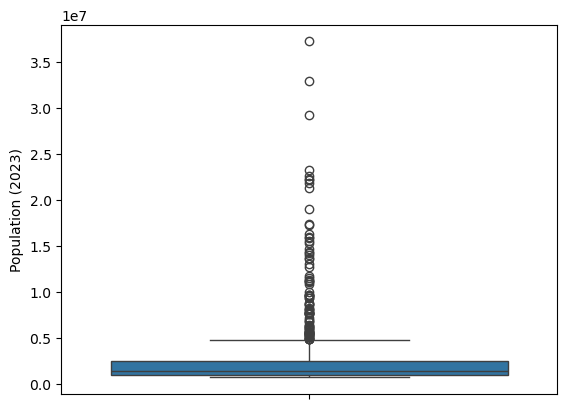

In [12]:
sns.boxplot(df['Population (2023)']) # type: ignore

# Data Cleaning 

## Handling MISSING Vallues

### Differrnet methods of handling missing values

1. Deleting the Column with missing data
2. Deleting the rows with missing data
3. Imputation
 >> 1. Numeric
 >> 2. Categorical
 >>> - use mode of the data to fill missing values
 >>> - use own Categories to nan values

4. Advanced Imputation
   

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('Dataset/AB_NYC_2019.csv')
df1=df.copy()
print(df.head())
df.head()
df.describe()
df.info()
df.isna().sum()

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
## Deleting the column
#deleting last review column
print(df1.shape)

df1.drop('last_review',axis=1,inplace=True)
df1.isna().sum()
print(df1.shape)



(48906, 16)
(48906, 15)


In [16]:
df2=df.copy()
## Deleting the rows which contaiin null values
print(df2.isna().sum())

df2.dropna(inplace=True)
print(df2.shape)
df2.isna().sum()



id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
(38832, 16)


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
## Imputation
#1 Numeric
df4=df.copy()
#Filling the numeric data with mean value
mean_val=df4['reviews_per_month'].mean()

df4['reviews_per_month'].fillna(mean_val,inplace=True)
df4.isna().sum()

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_23908\1821602862.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['reviews_per_month'].fillna(mean_val,inplace=True)


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
df5=df.copy()

df5.head()
df5.isna().sum()
df5['last_review'] = df5['last_review'].fillna(str(df5['last_review'].value_counts().index[0]))
df5.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [19]:
df6=df.copy()
print(df.isna().sum())
df6['last_review'].fillna("NOt Reviewed",inplace=True)
df6.sample(8)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


C:\Users\WELCOME\AppData\Local\Temp\ipykernel_23908\4083886063.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df6['last_review'].fillna("NOt Reviewed",inplace=True)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
33880,26837669,"Beautiful house in Brooklyn, New York City (34)",201822098,Charles,Brooklyn,Cypress Hills,40.67859,-73.89936,Entire home/apt,120,2,31,08-06-2019,2.59,1,99
1303,567195,Beautiful Garden Duplex in Brooklyn,2790324,Erin,Brooklyn,Bedford-Stuyvesant,40.68269,-73.94004,Entire home/apt,150,5,3,17-08-2015,0.04,1,0
4761,3369826,Quant 1bdrm in midtown west,17001535,Paul,Manhattan,Hell's Kitchen,40.75524,-73.99839,Entire home/apt,175,1,1,24-09-2014,0.02,1,347
23599,19094427,Spacious one bedroom in the heart of Inwood,16020315,Douglas,Manhattan,Inwood,40.86822,-73.92048,Entire home/apt,100,2,9,07-04-2019,0.59,1,0
3868,2362306,Peaceful Artsy Huge Sunny Bedroom!,10283677,Emma,Brooklyn,Flatbush,40.65173,-73.96035,Private room,55,3,8,25-10-2018,0.36,1,0
14600,11529142,Colorfull apart in NY.,149430,Tida,Manhattan,East Harlem,40.78687,-73.94542,Entire home/apt,120,5,35,01-07-2019,1.27,2,303
48592,36322141,Charming and Spacious Harlem Nest,54634154,Qai,Manhattan,Harlem,40.80260,-73.95373,Private room,75,3,0,NOt Reviewed,NaN,1,29
23345,18897423,Modern & Industrial LIC Accomodations,127560222,Christina,Queens,Long Island City,40.75578,-73.93666,Private room,259,2,3,05-12-2018,0.22,2,0


### Advanced Imputation

In [20]:
df7=df.copy()
print(df7.head(6))
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df7.iloc[:, :] = imputer.fit_transform(df7)
print(df7.isna().sum())
df7.head(6)


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500  

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,23-06-2019,0.02,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129


For more sophisticated imputation, consider methods like k-nearest neighbors, where missing values are predicted based on their proximity to similar instances. For time-series data, techniques like forward-fill or backward-fill imputation can be effective.

In [21]:
df8=df.copy()
print(df8.isna().sum())
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df8.iloc[:,13:14] = imputer.fit_transform(df8.iloc[:,13:14])
print(df8.isna().sum())

df['reviews_per_month']=df['reviews_per_month'].interpolate()
print(df.isna().sum())


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                  

# Dealing with Duplicates


In [22]:
df=pd.read_csv('Dataset/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [23]:
df.duplicated().sum()

483

In [24]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [25]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [26]:
df[df.duplicated(keep='last')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,ABC News - US & World News,NEWS_AND_MAGAZINES,4.0,18976,35M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"June 6, 2018",3.19.11,5.0 and up
3788,NBC News,NEWS_AND_MAGAZINES,4.1,63020,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"February 13, 2018",Varies with device,Varies with device
3790,USA TODAY,NEWS_AND_MAGAZINES,4.1,49259,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"August 2, 2018",Varies with device,Varies with device
3792,CNN Breaking US & World News,NEWS_AND_MAGAZINES,4.0,293080,25M,"10,000,000+",Free,0,Everyone 10+,News & Magazines,"August 6, 2018",5.17,4.4 and up


In [27]:
df.duplicated(['App','Category','Content Rating']).sum()

1096

In [28]:
df2=df.drop_duplicates(['App','Category','Content Rating'])
df2.duplicated().sum()

0

In [29]:
df=df.drop_duplicates(keep=False)
df.duplicated().sum()

0


- reset_index() Function
Purpose: reset_index() is used to reset the index of a DataFrame. This can be particularly useful after filtering, sorting, or modifying the DataFrame in a way that disrupts the original indexing.

In [30]:
#sometimes indexes are duplicate

data_cleaned = df.reset_index(drop=True)

4. Tackling Near-Duplicates:

Near-duplicates are entries that are almost identical, but not exactly the same. Levenshtein distance or cosine similarity can help identify such cases. Libraries like fuzzywuzzy can be used for string comparison:


```python
from fuzzywuzzy import fuzz

similarity = fuzz.ratio("string1", "string2")

```


5. Advanced Techniques:

For larger datasets, more advanced techniques like Locality-Sensitive Hashing (LSH) can be used to efficiently identify and handle duplicate or similar data points.

6. Preprocessing in ML Pipelines:

In machine learning pipelines, you can integrate duplicate handling as part of the data preprocessing step. This ensures that models are trained on clean and unbiased data.

7. Regular Data Audits:

To maintain data quality over time, regular audits should be conducted to identify new duplicates that might have been introduced due to updates or additions to the dataset.



# Handling OUTLIERS
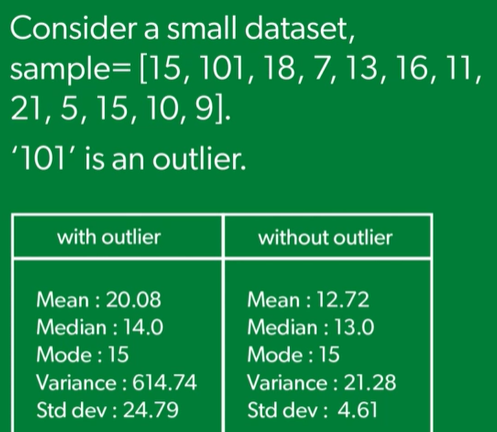
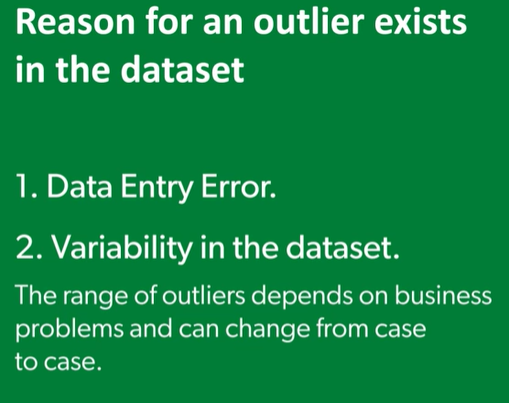
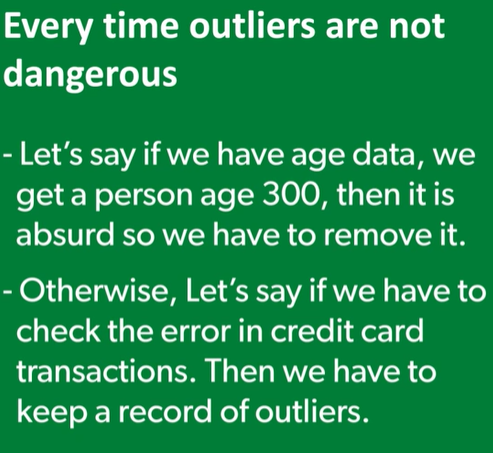
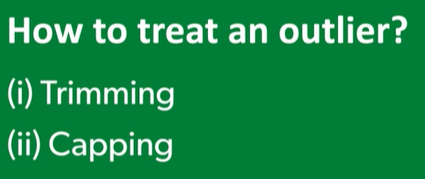
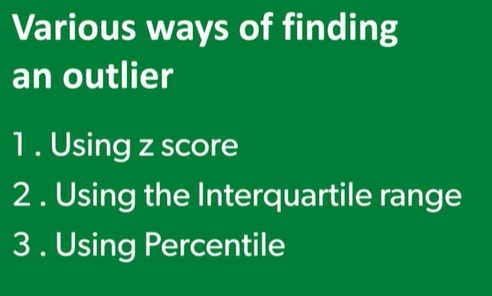

## z-score
        for normally distributed data

In [31]:
data=pd.read_csv('Dataset/scholarship.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   semester_percentage     1000 non-null   float64
 1   scholarship_exam_marks  1000 non-null   int64  
 2   got_scholarship         1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


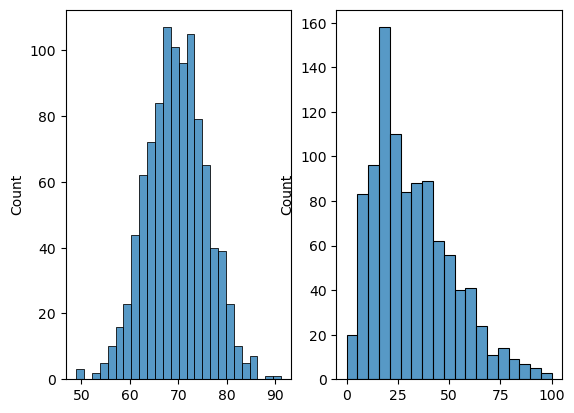

In [32]:
plt.subplot(1,2,1)
sns.histplot(list((data['semester_percentage'])))
plt.subplot(1,2,2)
sns.histplot(list(data['scholarship_exam_marks']))
plt.show()

In [33]:
description=data.describe()
print((description))
mean_val=data['semester_percentage'].mean()
std_val=data['semester_percentage'].std()
min_val=data['semester_percentage'].min()
max_val=data['semester_percentage'].max()

       semester_percentage  scholarship_exam_marks  got_scholarship
count          1000.000000             1000.000000      1000.000000
mean             69.612400               32.225000         0.489000
std               6.158979               19.130822         0.500129
min              48.900000                0.000000         0.000000
25%              65.500000               17.000000         0.000000
50%              69.600000               28.000000         0.000000
75%              73.700000               44.000000         1.000000
max              91.200000              100.000000         1.000000


In [34]:
# FInding the boundary values
upper_limit=mean_val + 3*std_val 
lower_limit=mean_val - 3*std_val 
print(upper_limit)
print(type(lower_limit))

88.08933625397168
<class 'numpy.float64'>


In [35]:
# Finding the outliers

print(data[data['semester_percentage']<lower_limit ])
print(data[data['semester_percentage']>upper_limit ])

     semester_percentage  scholarship_exam_marks  got_scholarship
485                 49.2                      44                1
997                 48.9                      34                0
999                 49.0                      10                1
     semester_percentage  scholarship_exam_marks  got_scholarship
995                 88.7                      44                1
996                 91.2                      65                1


In [36]:
Trimmed=data[(data["semester_percentage"]>lower_limit) & (data["semester_percentage"]<upper_limit) ]
print(Trimmed)

     semester_percentage  scholarship_exam_marks  got_scholarship
0                   71.9                      26                1
1                   74.6                      38                1
2                   75.4                      40                1
3                   64.2                       8                1
4                   72.3                      17                0
..                   ...                     ...              ...
991                 70.4                      57                0
992                 62.6                      12                0
993                 67.3                      21                1
994                 64.8                      63                0
998                 86.2                      46                1

[995 rows x 3 columns]


In [37]:
#Another method of trimming
# construct a col in the dataframe
data['z_val']=(data['semester_percentage']-data['semester_percentage'].mean())/data['semester_percentage'].std()

data[(data["z_val"]>-3) & (data["z_val"]<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_val
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


In [38]:
#Capping
data["semester_percentage"] =np.where(data["semester_percentage"]>upper_limit,upper_limit,
                                      np.where(data["semester_percentage"]<lower_limit, lower_limit, data["semester_percentage"] ))


#### IQR 
       for skewed data
       as we see from above displot that scholarship_exam_marks a rightly skewed so we use iqr rather than z score to remove outlieres

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_23908\1085882243.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['scholarship_exam_marks'])


(985, 4)
(1000, 4)


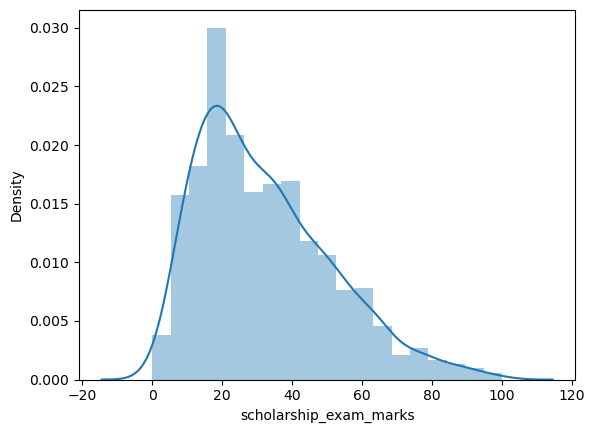

In [39]:
Q3=data['scholarship_exam_marks'].quantile(0.75)
Q1=data['scholarship_exam_marks'].quantile(0.25)
IQR=Q3-Q1
upper_limit=Q3+IQR*1.5
lower_limit=Q1-IQR*1.5
sns.distplot(data['scholarship_exam_marks'])
# Trimming
Trimmed=data[(data["scholarship_exam_marks"]>lower_limit) & (data["scholarship_exam_marks"]<upper_limit) ]
#Capping
Capped=np.where(upper_limit<data['scholarship_exam_marks'],upper_limit,np.where(lower_limit>data['scholarship_exam_marks'],lower_limit,data['scholarship_exam_marks']))
data['scholarship_exam_marks']=Capped
print(Trimmed.shape)
print(data.shape)

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_23908\3302120953.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_23908\3302120953.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Trimmed["scholarship_exam_marks"])

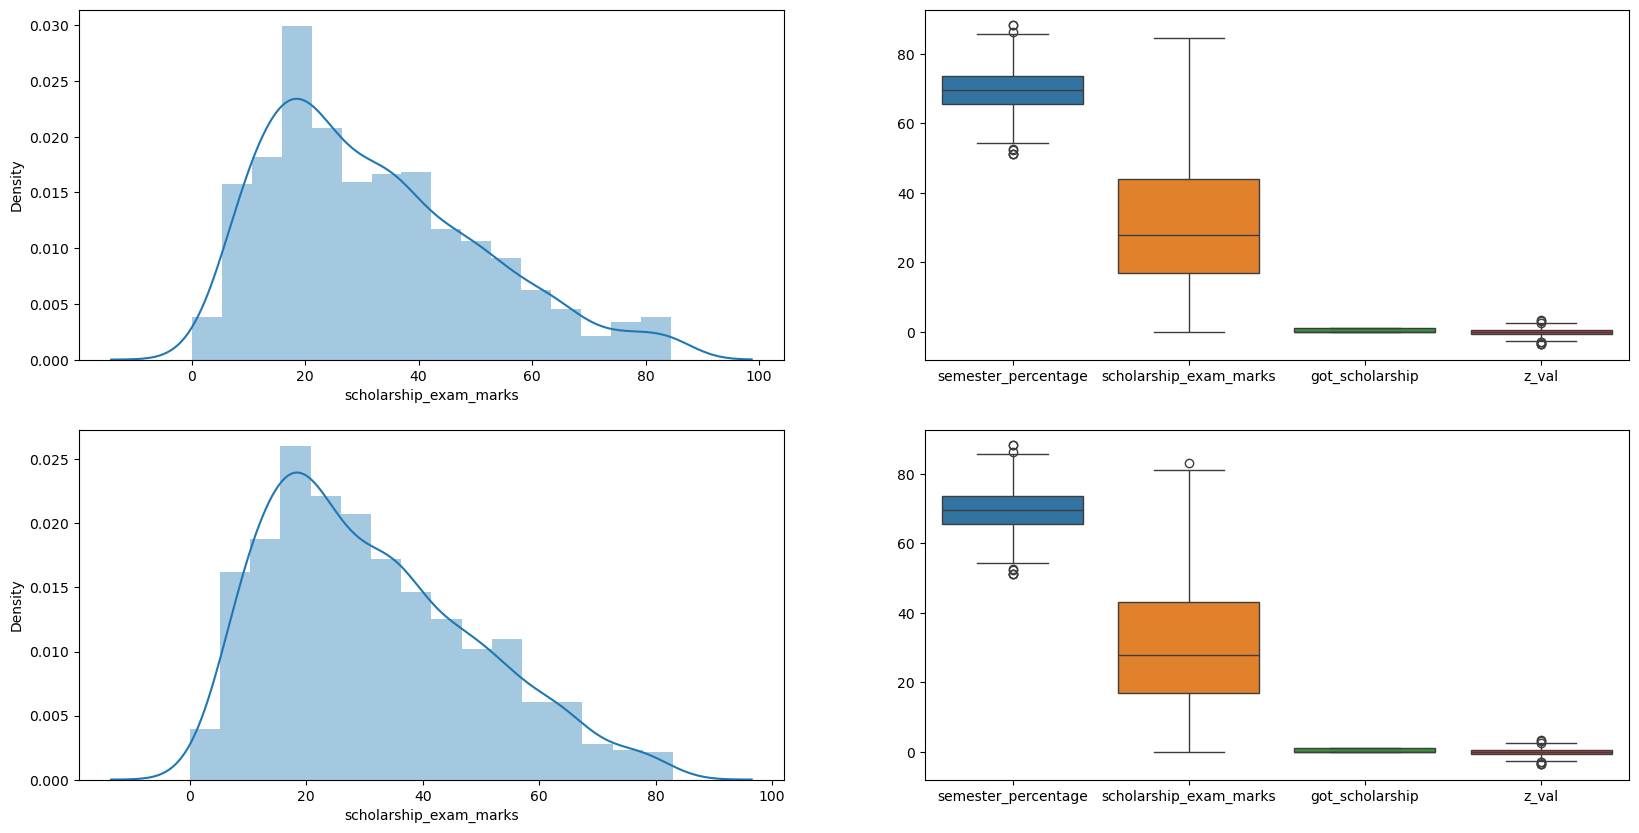

In [40]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(data["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(data)

plt.subplot(2,2,3)
sns.distplot(Trimmed["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(Trimmed)

plt.show()

## Percentiles will Remove outliers


             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699


<Axes: >

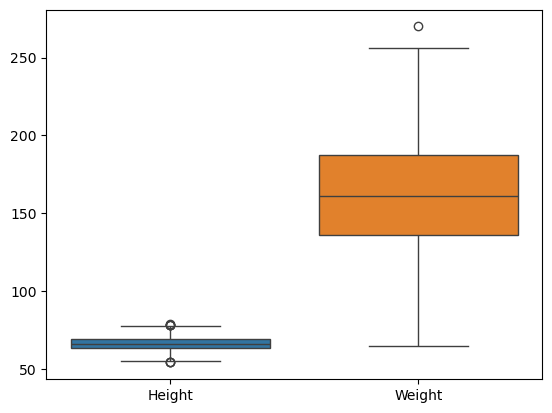

In [41]:
data=pd.read_csv('Dataset/weight-height.csv')

print(data.describe())

sns.boxplot(data)

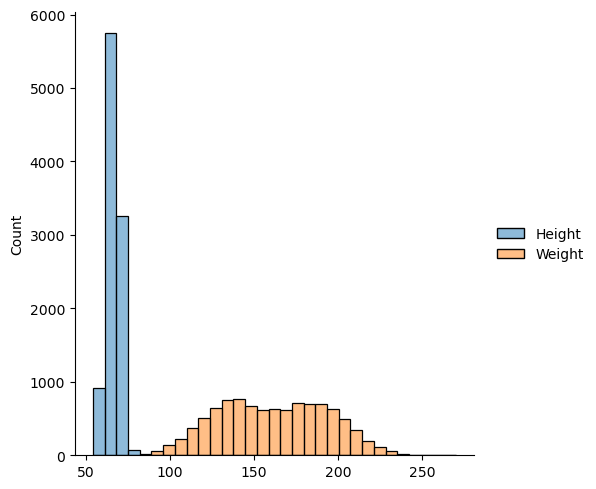

In [42]:
# plt.figure(figsize=(20,100))
sns.displot(data)
# plt.show()

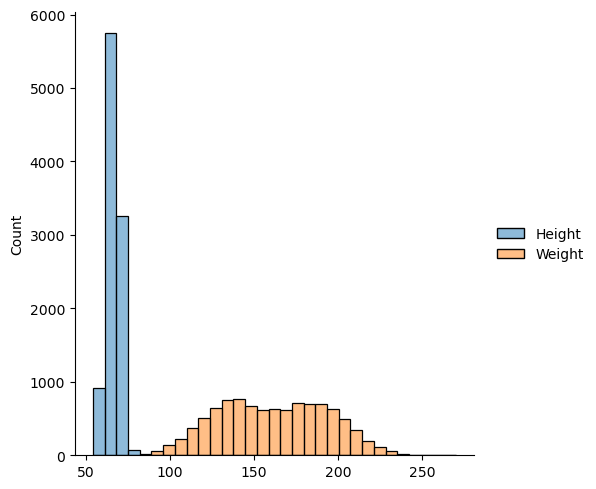

In [43]:
trim=data[(data['Height']>lower_limit) & (data['Height']<upper_limit)]
sns.displot(trim)

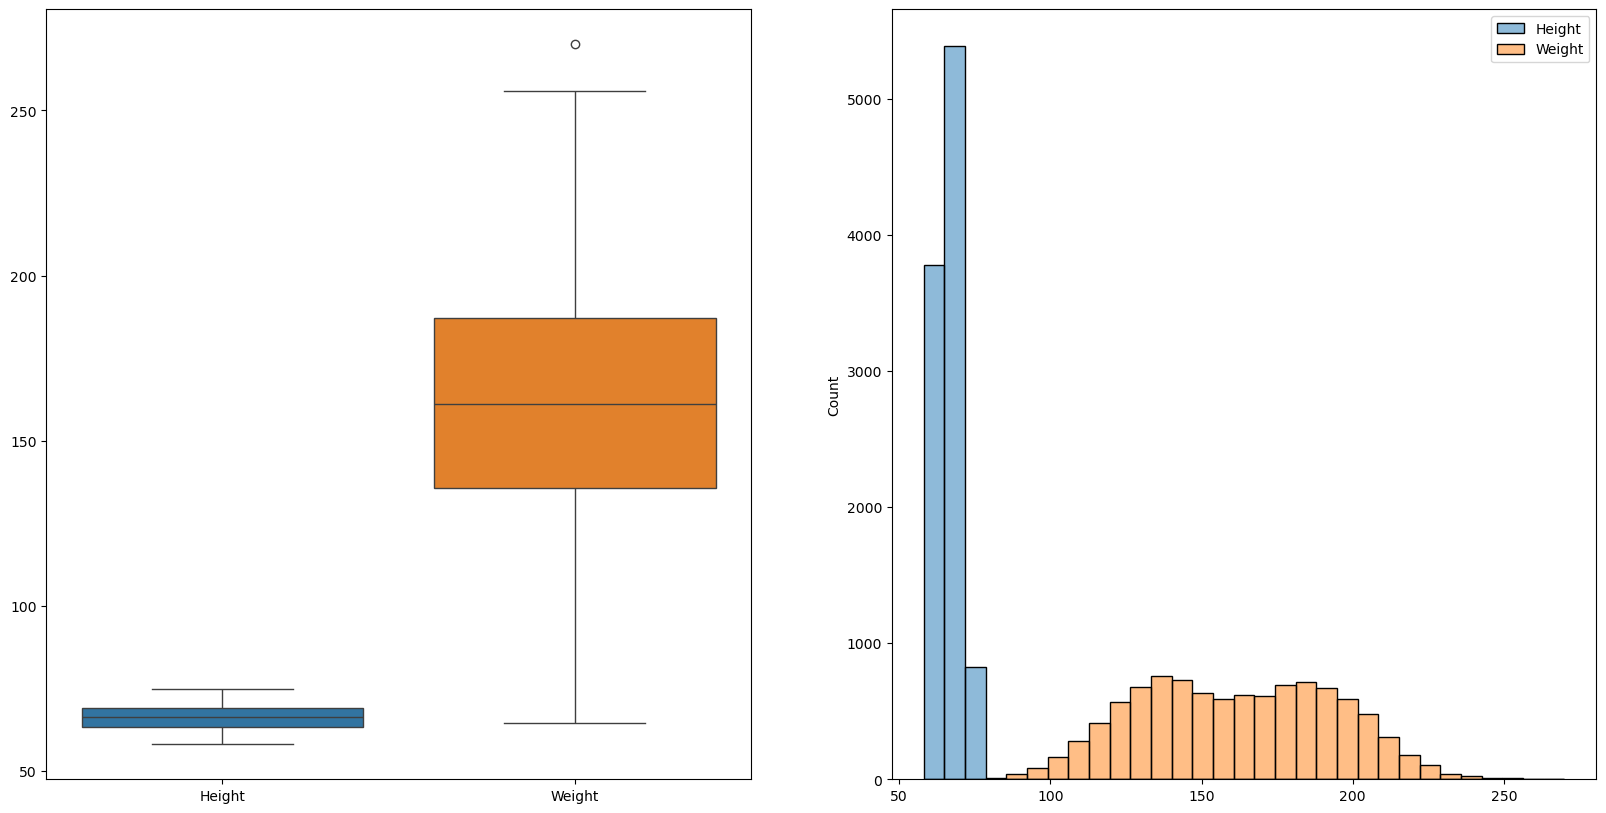

In [44]:
lower_limit=data['Height'].quantile(0.01)
upper_limit=data['Height'].quantile(0.99)

data['Height']=np.where(data['Height']>upper_limit,upper_limit,np.where(data['Height']<lower_limit,lower_limit,data['Height']))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data)
plt.subplot(1,2,2)
sns.histplot(data)
plt.show()

## Checking the data types of column

In [45]:
import pandas as pd

# Create a sample DataFrame
data = {'A': [1, 2, 3, 4],
        'B': [5.1, 6.2, 7.3, 8.4],
        'C': ['apple', 'banana', 'cherry', 'date']}

df = pd.DataFrame(data)

# Check the data types of columns
print("Original Data Types:")
print(df.dtypes)

# Convert 'A' column from int to float
df['A'] = df['A'].astype(float)

# Convert 'B' column from float to int
df['B'] = df['B'].astype(int)

# Convert 'C' column from object (string) to category
df['C'] = df['C'].astype('category')

# Check the data types after conversion
print("\nData Types after Conversion:")
print(df.dtypes)


Original Data Types:
A      int64
B    float64
C     object
dtype: object

Data Types after Conversion:
A     float64
B       int32
C    category
dtype: object
